In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def plot_categorical_columns(df: pd.DataFrame, categorical_cols: list):
    num_cols = len(categorical_cols)
    num_rows = math.ceil(num_cols / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()
        axes[i].bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
        axes[i].set_title(f'{col} (Count)')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [5]:
def plot_numerical_columns(df: pd.DataFrame, numerical_cols: list):
    num_cols = len(numerical_cols)
    num_rows = math.ceil(num_cols / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='salmon', bins=30)
        axes[i].set_title(f'{col} (Distribution)')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [6]:
categorical_cols= ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

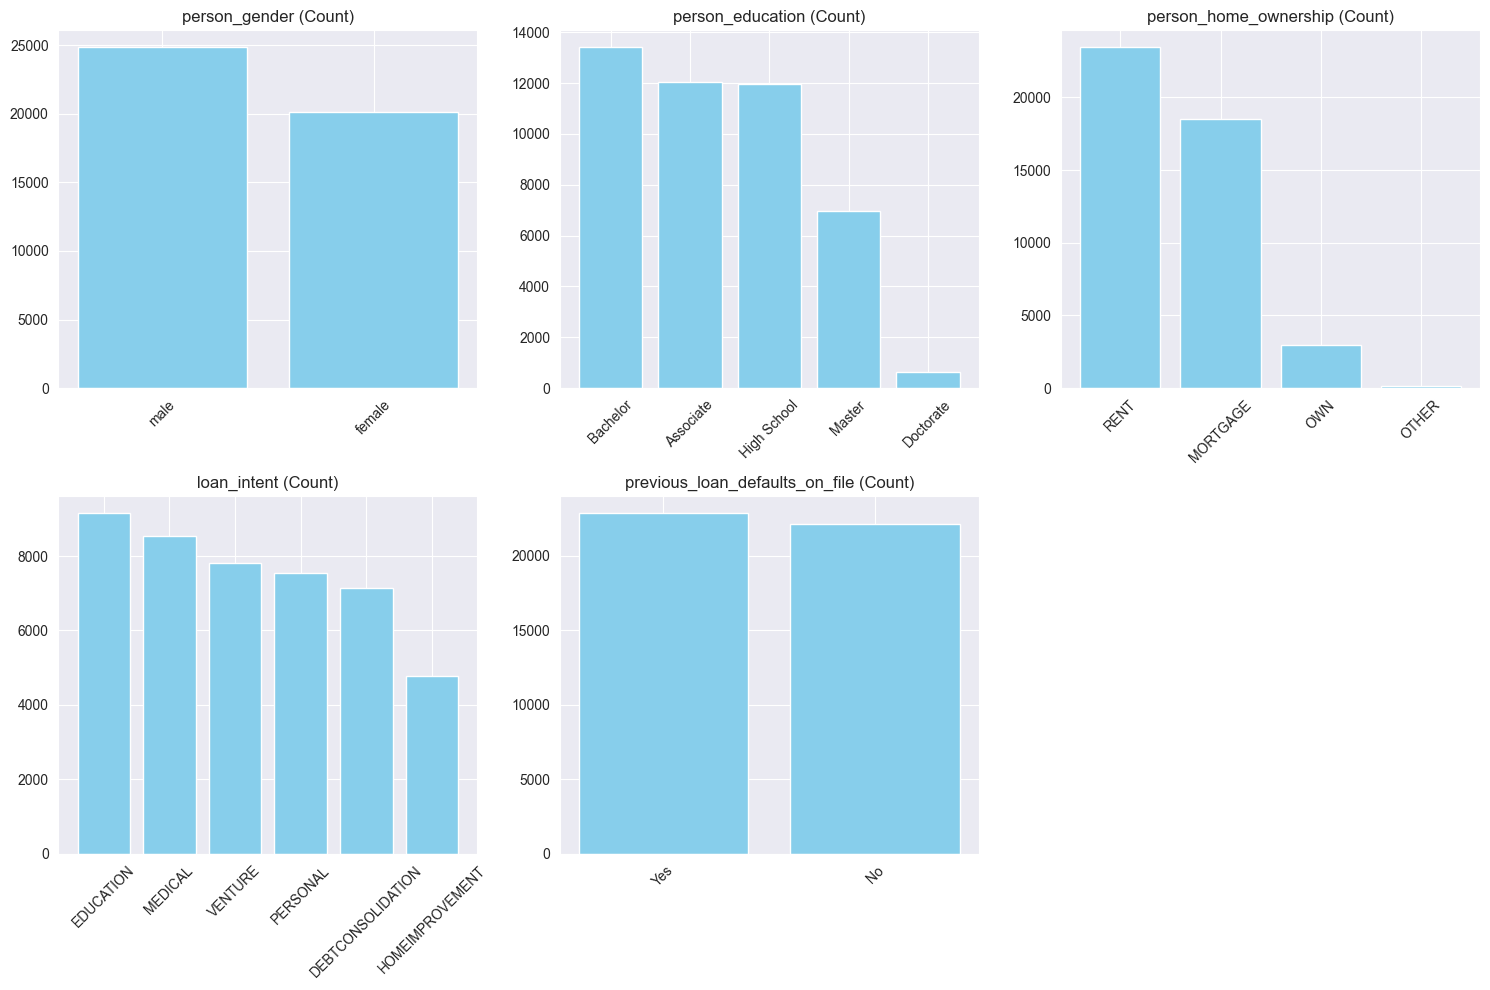

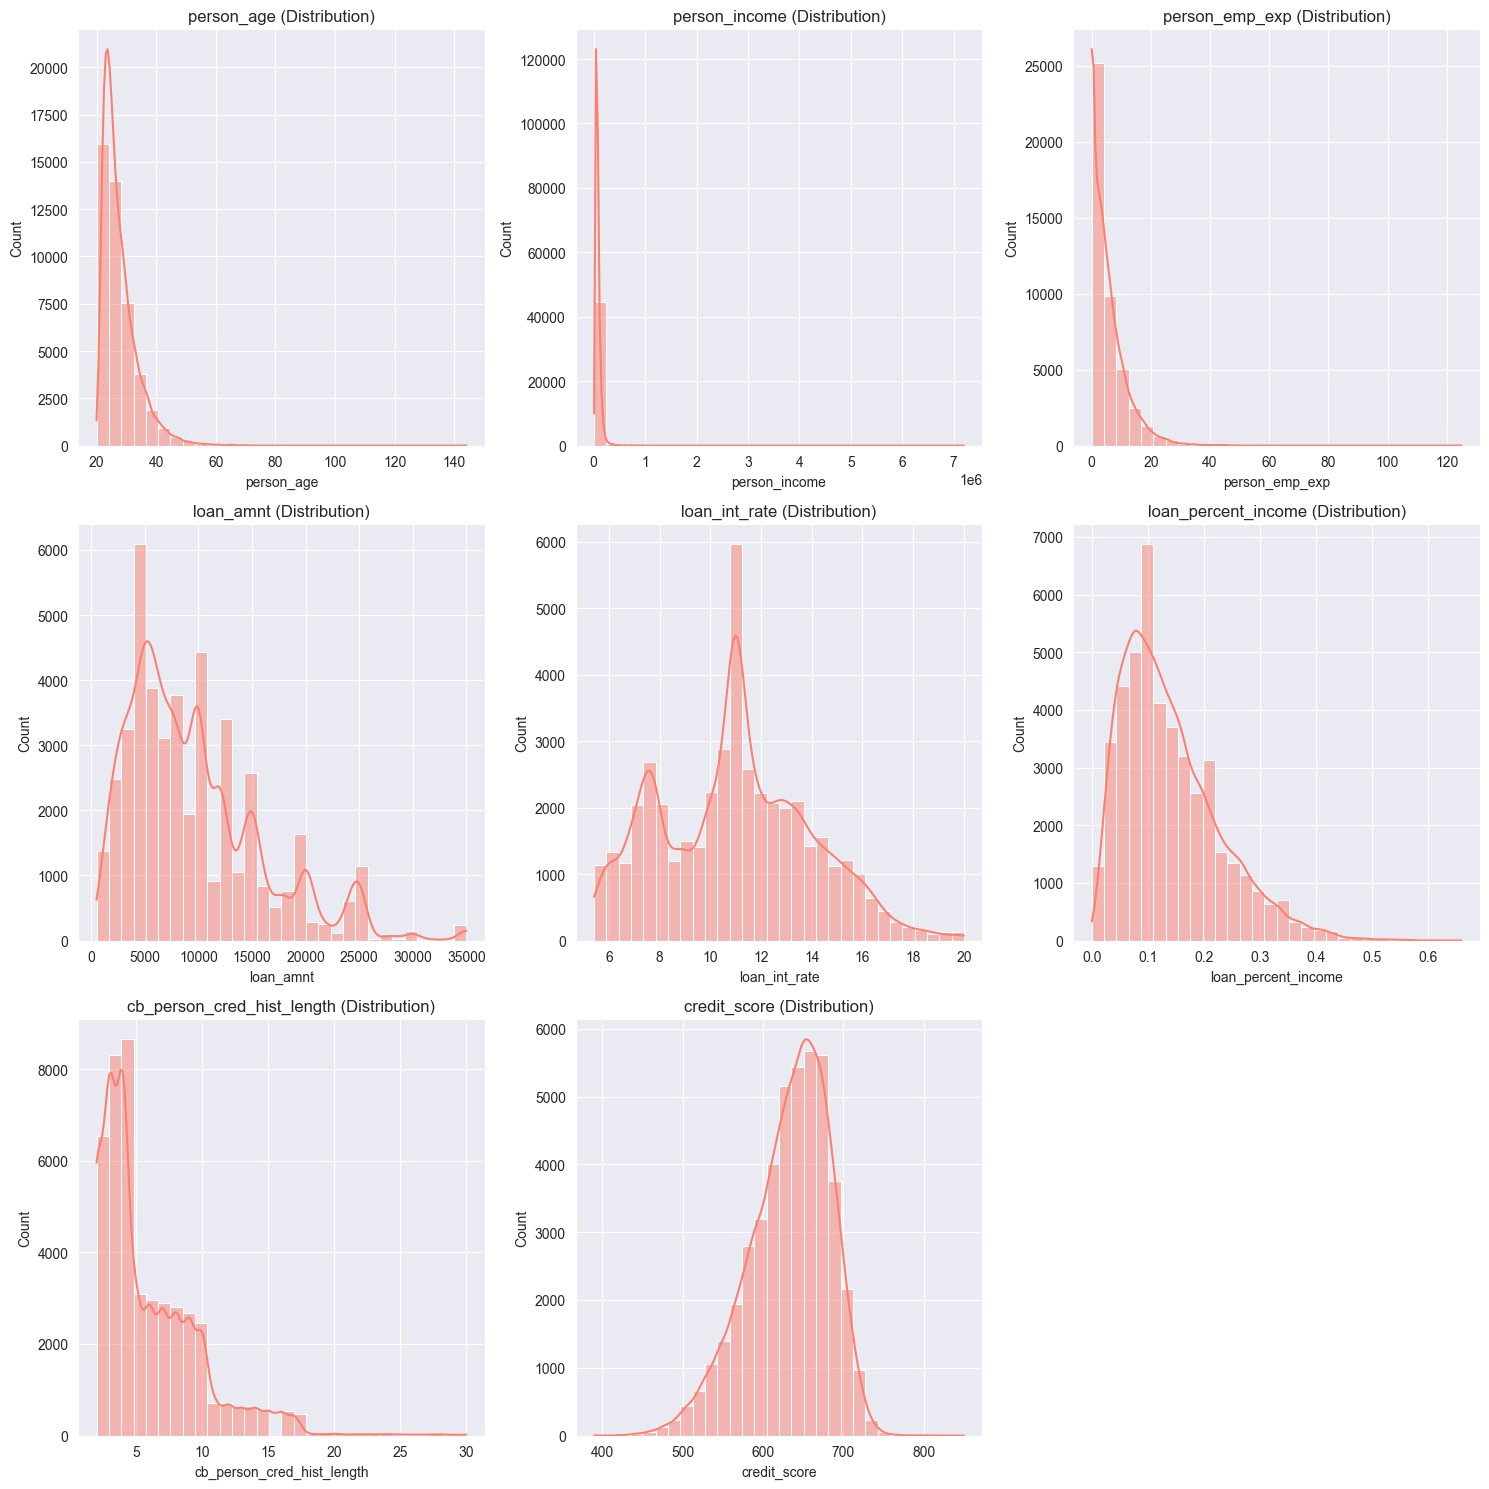

In [7]:
import math

plot_categorical_columns(df, categorical_cols)
plot_numerical_columns(df, numerical_cols)

In [8]:
skewed_cols = ['person_age', 'person_income', 'person_emp_exp',
               'loan_amnt', 'loan_percent_income',
               'cb_person_cred_hist_length', 'credit_score']

norm_cols= ['loan_int_rate']

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [10]:
def apply_yeo_johnson_on_left_skewed(df: pd.DataFrame, skewed_cols: list):
    pt = PowerTransformer(method='yeo-johnson')
    df_transformed = df.copy()

    for col in skewed_cols:  # Consider it left-skewed
        reshaped = df[[col]].dropna()  # Drop NaNs temporarily
        transformed = pt.fit_transform(reshaped)
        df_transformed.loc[reshaped.index, col] = transformed

    return df_transformed

In [11]:
df_transformed = apply_yeo_johnson_on_left_skewed(df, skewed_cols)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_4660\2535163183.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-1.45090001 -1.45090001 -0.08360331 ...  0.65070681  0.14896785
 -0.78360458]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_transformed.loc[reshaped.index, col] = transformed
C:\Users\Akshay\AppData\Local\Temp\ipykernel_4660\2535163183.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-1.37672516 -2.11601292 -0.06033249 ...  0.67879598 -0.66584082
 -0.20431105]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_transformed.loc[reshaped.index, col] = transformed


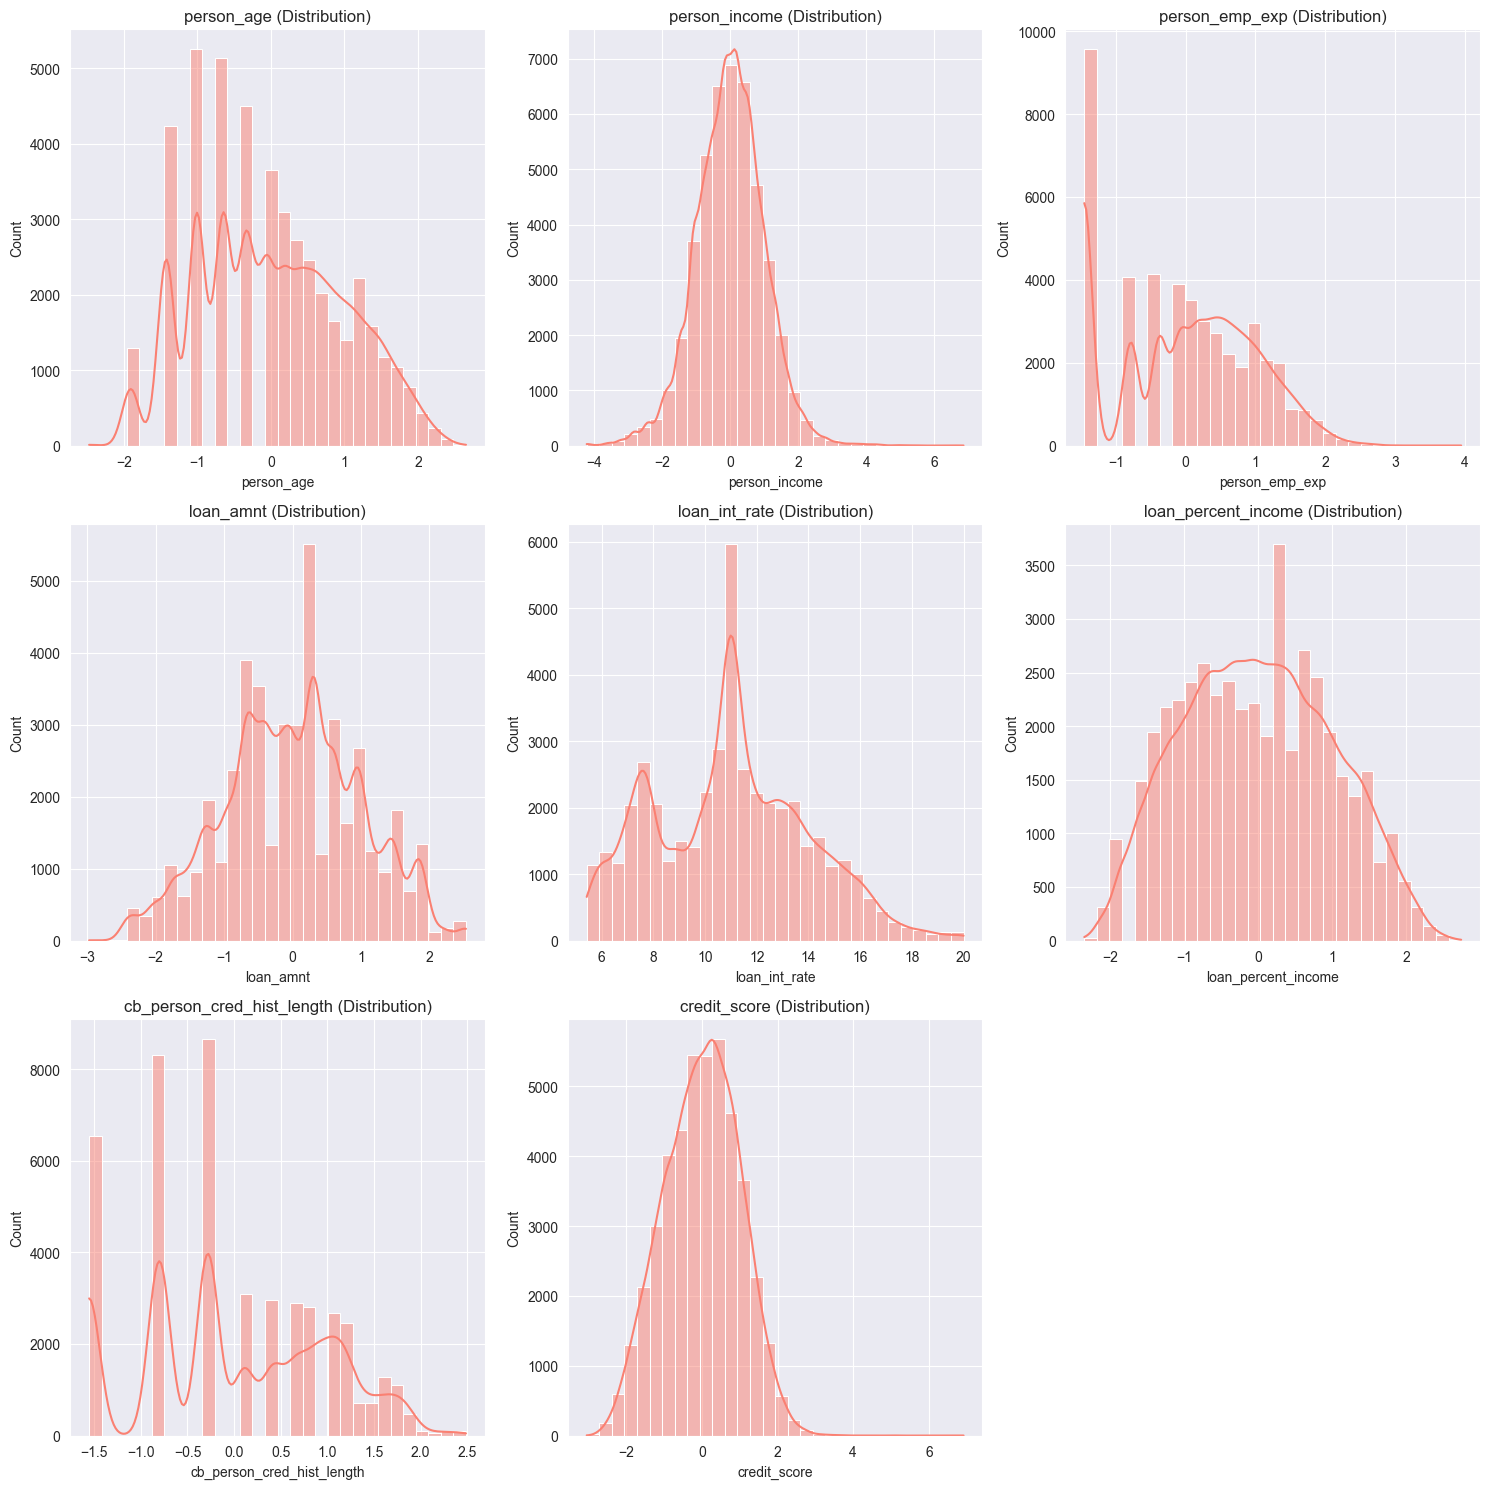

In [12]:
plot_numerical_columns(df_transformed, numerical_cols)

In [13]:
df_transformed.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-1.423769,female,Master,0.135340,-1.450900,RENT,2.534364,PERSONAL,16.02,2.396375,-0.801335,-1.376725,No,1
1,-1.906991,female,High School,-3.296336,-1.450900,OWN,-2.401355,EDUCATION,11.14,-0.658968,-1.554322,-2.116013,Yes,0
2,-0.338087,female,High School,-3.269820,-0.083603,MORTGAGE,-0.535774,MEDICAL,12.87,2.244585,-0.801335,-0.060332,No,1
3,-1.008732,female,Bachelor,0.318700,-1.450900,RENT,2.534364,MEDICAL,15.23,2.244585,-1.554322,0.848928,No,1
4,-0.649989,male,Master,-0.015934,-0.783605,RENT,2.534364,MEDICAL,14.27,2.498671,-0.280499,-0.980816,No,1


In [14]:
def create_dummies(df: pd.DataFrame, drop_first: bool = True):
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return df_encoded

In [15]:
df_final = create_dummies(df_transformed)

In [16]:
df_final.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,-1.423769,0.135340,-1.450900,2.534364,16.02,2.396375,-0.801335,-1.376725,1,0,...,1,0,0,1,0,0,0,1,0,0
1,-1.906991,-3.296336,-1.450900,-2.401355,11.14,-0.658968,-1.554322,-2.116013,0,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.338087,-3.269820,-0.083603,-0.535774,12.87,2.244585,-0.801335,-0.060332,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.008732,0.318700,-1.450900,2.534364,15.23,2.244585,-1.554322,0.848928,1,0,...,0,0,0,1,0,0,1,0,0,0
4,-0.649989,-0.015934,-0.783605,2.534364,14.27,2.498671,-0.280499,-0.980816,1,1,...,1,0,0,1,0,0,1,0,0,0


In [17]:
X = df_final.drop('loan_status', axis=1)
y = df_final['loan_status']

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
import os
import dagshub
import mlflow
from mlflow.exceptions import MlflowException

# Configuration - Replace with your actual details
DAGSHUB_USERNAME = "Akshat-Sharma-110011"
DAGSHUB_TOKEN = "268f8944c99d48868fa3235eb38ea909e929c70c"  # Keep this secret!
REPO_NAME = "Loan-Status-Approval"

# 1. Set environment variables
os.environ["MLFLOW_TRACKING_USERNAME"] = DAGSHUB_USERNAME
os.environ["MLFLOW_TRACKING_PASSWORD"] = DAGSHUB_TOKEN

# 2. Initialize DagsHub - do this first
dagshub.init(
    repo_owner=DAGSHUB_USERNAME,
    repo_name=REPO_NAME,
    mlflow=True
)

# 3. Set the tracking URI with the correct format
mlflow.set_tracking_uri(f"https://dagshub.com/{DAGSHUB_USERNAME}/{REPO_NAME}.mlflow")

# 4. Handle experiment creation more robustly
EXPERIMENT_NAME = "CatBoost Baseline"

try:
    # Check if experiment exists
    if not mlflow.get_experiment_by_name(EXPERIMENT_NAME):
        print(f"Experiment '{EXPERIMENT_NAME}' does not exist. Creating...")
        mlflow.create_experiment(EXPERIMENT_NAME)
    mlflow.set_experiment(EXPERIMENT_NAME)
    print(f"Successfully set experiment: {EXPERIMENT_NAME}")

except MlflowException as e:
    print(f"MLflow Error: {e}")
except Exception as e:
    print(f"Unexpected Error: {e}")

Initialized MLflow to track repo "Akshat-Sharma-110011/Loan-Status-Approval"

Repository Akshat-Sharma-110011/Loan-Status-Approval initialized!

Experiment 'CatBoost Baseline' does not exist. Creating...
Successfully set experiment: CatBoost Baseline


In [25]:
import logging
import os
import time
import mlflow
import mlflow.sklearn
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

logging.info("Starting MLflow run...")

with mlflow.start_run():
    start_time = time.time()

    try:
        logging.info("Logging preprocessing parameters...")
        mlflow.log_param("random_state", 42)
        mlflow.log_param("test_size", 0.20)

        logging.info("Initializing CatBoostClassifier model...")
        model = CatBoostClassifier(
            iterations=500,
            learning_rate=0.05,
            depth=6,
            verbose=0,
            random_state=42
        )

        logging.info("Fitting the model...")
        model.fit(X_train_resampled, y_train_resampled)
        logging.info("Model training complete.")

        logging.info("Logging model parameters...")
        mlflow.log_param("model", "CatBoostClassifier")
        mlflow.log_param("iterations", 500)
        mlflow.log_param("learning_rate", 0.05)
        mlflow.log_param("depth", 6)

        logging.info("Making predictions...")
        y_pred = model.predict(X_test)

        logging.info("Calculating evaluation metrics...")
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        logging.info("Logging evaluation metrics...")
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        logging.info("Saving and logging the model...")
        mlflow.sklearn.log_model(model, "model")  # still compatible via mlflow.sklearn

        # Log execution time
        end_time = time.time()
        logging.info(f"Model training and logging completed in {end_time - start_time:.2f} seconds.")

        # Print the results for verification
        logging.info(f"Accuracy: {accuracy}")
        logging.info(f"Precision: {precision}")
        logging.info(f"Recall: {recall}")
        logging.info(f"F1 Score: {f1}")

    except Exception as e:
        logging.error(f"An error occurred: {e}", exc_info=True)

2025-05-03 14:25:26,486 - INFO - Starting MLflow run...
2025-05-03 14:25:26,876 - INFO - Logging preprocessing parameters...
2025-05-03 14:25:27,607 - INFO - Initializing CatBoostClassifier model...
2025-05-03 14:25:27,609 - INFO - Fitting the model...
2025-05-03 14:25:31,634 - INFO - Model training complete.
2025-05-03 14:25:31,636 - INFO - Logging model parameters...
2025-05-03 14:25:33,083 - INFO - Making predictions...
2025-05-03 14:25:33,090 - INFO - Calculating evaluation metrics...
2025-05-03 14:25:33,099 - INFO - Logging evaluation metrics...
2025-05-03 14:25:34,493 - INFO - Saving and logging the model...
2025/05/03 14:25:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025-05-03 14:25:42,086 - INFO - Model training and logging completed in 15.21 seconds.
2025-05-03 14:25:42,087 - INFO - Accuracy: 0.9281111111111111
2025-05-03 14:25:42,088 - INFO -

🏃 View run glamorous-slug-357 at: https://dagshub.com/Akshat-Sharma-110011/Loan-Status-Approval.mlflow/#/experiments/0/runs/95916f8f5d9643218f21dc64d8a1b4fe
🧪 View experiment at: https://dagshub.com/Akshat-Sharma-110011/Loan-Status-Approval.mlflow/#/experiments/0
